#Classfication practice_ sonar dataset


The Sonar Dataset involves the prediction of whether or not an object
is a mine or a rock given the strength of sonar returns at different
angles.
It is a binary (2-class) classification problem. The number of
observations for each class is not balanced. There are 208 observations
with 60 input variables and 1 output variable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('/content/sonar.all-data.csv')
df.head()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.066,0.2273,0.31,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.555,0.6711,0.6415,0.7104,0.808,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.051,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.02    207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.066   207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.31    207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [4]:
df.describe()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.066,0.2273,0.31,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.555,0.6711,0.6415,0.7104,0.808,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.051,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,0.236376,0.250666,0.273544,0.297689,0.321429,0.379217,0.416495,0.453055,0.504797,0.563449,0.609209,0.624841,0.648010,0.673223,0.675444,0.700148,0.702115,0.693473,0.641895,0.581871,0.506281,0.439903,0.416761,0.401535,0.390343,0.382597,0.362331,0.338353,0.324986,0.311385,0.290403,0.278269,0.246368,0.213053,0.196909,0.160738,0.122537,0.091217,0.051995,0.020366,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,0.132923,0.140264,0.141262,0.164075,0.205158,0.232975,0.264213,0.261947,0.258614,0.263225,0.258434,0.256373,0.250335,0.239555,0.245520,0.237768,0.246252,0.237631,0.240818,0.220864,0.212917,0.213389,0.206907,0.230499,0.257756,0.262755,0.239546,0.212655,0.199210,0.179076,0.170717,0.169137,0.139308,0.132795,0.151924,0.134254,0.087155,0.062496,0.036029,0.013673,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,0.128200,0.133450,0.165750,0.176100,0.166500,0.195900,0.205500,0.241950,0.299050,0.350450,0.397550,0.406350,0.455250,0.540450,0.524800,0.543550,0.529800,0.533950,0.461300,0.414250,0.349300,0.284100,0.257350,0.217550,0.178550,0.154000,0.160000,0.174250,0.172450,0.185900,0.164100,0.158700,0.155200,0.126850,0.094450,0.068400,0.064200,0.044950,0.026300,0.011500,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,0.225100,0.249700,0.265500,0.281900,0.284000,0.307500,0.306800,0.370900,0.434800,0.543000,0.627500,0.667000,0.700700,0.701200,0.722100,0.754500,0.753900,0.731700,0.682500,0.607400,0.490600,0.430300,0.390300,0.349700,0.310800,0.319500,0.303900,0.310400,0.282900,0.279000,0.260500,0.244400,0.221100,0.177600,0.147300,0.121100,0.101500,0.077700,0.044900,0.017900,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,0.301800,0.331600,0.351500,0.386950,0.453050,0.536050,0.660050,0.679100,0.731900,0.809450,0.818050,0.832150,

In [5]:
#check for the missing values
df.isna().sum()

0.02      0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.018     0
0.0084    0
0.009     0
0.0032    0
R         0
Length: 61, dtype: int64

In [6]:
#label enoding target data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['R']=le.fit_transform(df["R"])

In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier

**Create pipeline**

In [10]:
from sklearn.pipeline import Pipeline
pipeline_lr=Pipeline([('logistic classifier',LogisticRegression())])
pipeline_svc=Pipeline([('support vector',SVC())])
pipeline_knn=Pipeline([('Nearest Neighbor',KNeighborsClassifier())])
pipeline_Nb=Pipeline([('Naive Bayes',GaussianNB())])
pipelines=[pipeline_lr,pipeline_svc,pipeline_knn,pipeline_Nb]

In [11]:
pipe_dict={0:"logistic classifier",1:"support vector",2:"Nearest Neighbor",3:"Naive Bayes"}

In [12]:
def train():
  for pipe in pipelines:
    pipe.fit(xtrain,ytrain)


In [13]:
def accuracy():
  for i,model in enumerate(pipelines):
    print("For",pipe_dict[i]," Accuracy is : ", model.score(xtest,ytest))

In [14]:
def bestmodel():
  best_accuracy=0
  best_classifier=0
  best_pipline=""
  for i,model in enumerate(pipelines):
    if best_accuracy < model.score(xtest,ytest):
      best_accuracy=model.score(xtest,ytest)
      best_pipline=model
      best_classifier=pipe_dict[i]

  print("best accuracy model= {}, with accuracy = {}".format(best_classifier,best_accuracy))

**For original data**

In [15]:
a=train()
b=accuracy()
c=bestmodel()

For logistic classifier  Accuracy is :  0.7619047619047619
For support vector  Accuracy is :  0.7619047619047619
For Nearest Neighbor  Accuracy is :  0.7380952380952381
For Naive Bayes  Accuracy is :  0.6428571428571429
best accuracy model= logistic classifier, with accuracy = 0.7619047619047619


In [16]:
from sklearn.preprocessing import StandardScaler

pipeline_lr=Pipeline([('Scaler',StandardScaler()),
                      ('logistic classifier',LogisticRegression()),])
pipeline_svc=Pipeline([('Scaler',StandardScaler()),
                       ('support vector',SVC())])
pipeline_knn=Pipeline([('Scaler',StandardScaler()),
                       ('Nearest Neighbor',KNeighborsClassifier())])
pipeline_Nb=Pipeline([('Scaler',StandardScaler()),
                      ('Naive Bayes',GaussianNB())])
pipelines=[pipeline_lr,pipeline_svc,pipeline_knn,pipeline_Nb]


**For scaled data**

In [17]:
a=train()
b=accuracy()
c=bestmodel()

For logistic classifier  Accuracy is :  0.7619047619047619
For support vector  Accuracy is :  0.7619047619047619
For Nearest Neighbor  Accuracy is :  0.7142857142857143
For Naive Bayes  Accuracy is :  0.6428571428571429
best accuracy model= logistic classifier, with accuracy = 0.7619047619047619


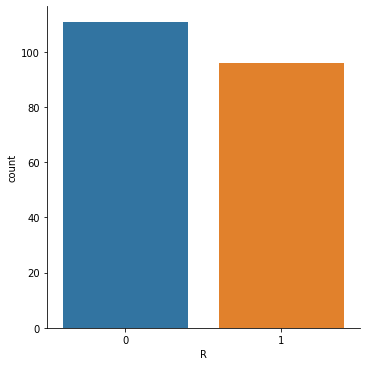

In [18]:
sns.catplot(data=df,x="R",kind="count")

**For balanced data**

In [25]:
R=df[df["R"]==0].index
M=df[df["R"]==1].index
random_index=np.array(np.random.choice(R,len(M),replace=False))
udersample_index=np.concatenate([fraud,random_index])
undersample=df.iloc[udersample_index,:]
x=undersample.drop(columns=["R"])
y=undersample["R"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)


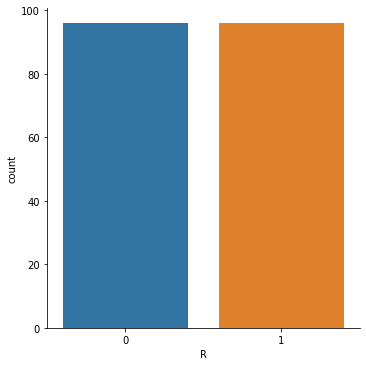

In [22]:
sns.catplot(data=undersample,x="R",kind="count")

In [20]:
a=train()
b=accuracy()
c=bestmodel()

For logistic classifier  Accuracy is :  0.6923076923076923
For support vector  Accuracy is :  0.8461538461538461
For Nearest Neighbor  Accuracy is :  0.8205128205128205
For Naive Bayes  Accuracy is :  0.6410256410256411
best accuracy model= support vector, with accuracy = 0.8461538461538461


In [26]:
#over sampling of data
R=df[df["R"]==0].index
M=df[df["R"]==1].index

#random_index for 'M' with majority class size
random_index=np.array(np.random.choice(M,len(R),replace=True))

oversample_index=np.concatenate([R,random_index])
oversample=df.iloc[oversample_index,:]
x=oversample.drop(columns=["R"])
y=oversample["R"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
a=train()
b=accuracy()
c=bestmodel()

For logistic classifier  Accuracy is :  0.8444444444444444
For support vector  Accuracy is :  0.9111111111111111
For Nearest Neighbor  Accuracy is :  0.9333333333333333
For Naive Bayes  Accuracy is :  0.6888888888888889
best accuracy model= Nearest Neighbor, with accuracy = 0.9333333333333333


**Conclusion :**

best accuracy model= Nearest Neighbor, with accuracy = 0.9333333333333333